In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [0]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

## **Format Data:**

In [10]:
dataset.head()

,Unnamed: 0,sentiment,text
0,0,0,is upset that he can't update his Facebook by ...
1,1,0,@Kenichan I dived many times for the ball. Man...
2,2,0,my whole body feels itchy and like its on fire
3,3,0,"@nationwideclass no, it's not behaving at all...."
4,4,0,@Kwesidei not the whole crew


In [11]:
dataset.drop(columns=['Unnamed: 0'])

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1048570,4,My GrandMa is making Dinenr with my Mum
1048571,4,Mid-morning snack time... A bowl of cheese noo...
1048572,4,@ShaDeLa same here say it like from the Termi...
1048573,4,@DestinyHope92 im great thaanks wbuu?


In [0]:
# To list:

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [14]:
print(sentences[1])
print(labels[1])

# 0: Negative
# 2: Neutral
# 4: Positive

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
0


In [0]:
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0: training_size]
testing_senteces = sentences[: training_size]
training_labels = labels[0: training_size]
testing_labels = labels[: training_size]

# Put labels into list to use later:

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## **Tokenizing and Pad**

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 280
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_senteces)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## **Building the Model**

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(embedding_dim,
                         return_sequences=True)
))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['accuracy'])

In [20]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)
num_epochs=10
modelo = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final),
          callbacks=[callbacks])

Epoch 1/10
26215/26215 [==============================] - 799s 30ms/step - loss: 0.1435 - accuracy: 0.8984 - val_loss: 0.1070 - val_accuracy: 0.8774
Epoch 2/10
26215/26215 [==============================] - 801s 31ms/step - loss: 0.1235 - accuracy: 0.8822 - val_loss: 0.0942 - val_accuracy: 0.8852
Epoch 3/10
26215/26215 [==============================] - 804s 31ms/step - loss: 0.1475 - accuracy: 0.8770 - val_loss: 0.1319 - val_accuracy: 0.8666


Text(0, 0.5, 'Accuracy')

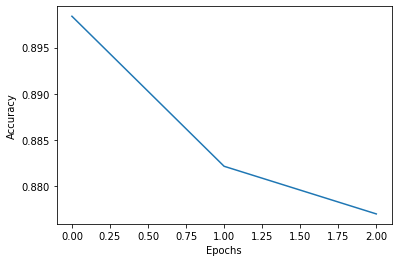

In [23]:
# Decrease because the early stopping

plt.plot(modelo.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

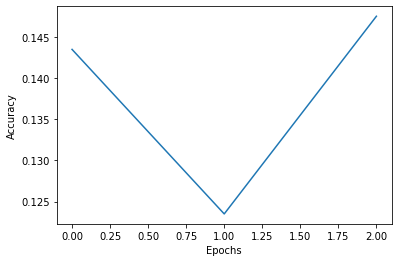

In [24]:
# Increase because the early stopping

plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## **Testing**

In [0]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)